In [12]:
import tensorflow_hub as hub
from tensorflow import compat
import numpy as np
import matplotlib.pyplot as plt

tf = compat.v1

In [13]:
model = hub.load("https://tfhub.dev/google/spice/2")

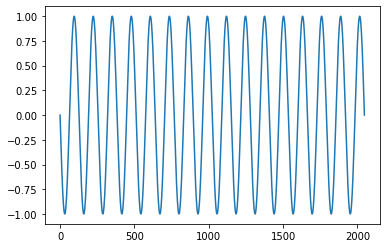

In [5]:
# A single wave, 128 samples (8ms at 16kHz) long.
wave = np.array(np.sin(np.linspace(-np.pi, np.pi, 128)), dtype=np.float32)

# 16 such waves (2048 samples).
waves = np.tile(wave, 16)
plt.plot(waves)

In [14]:
input = tf.constant(waves)
output = model.signatures["serving_default"](input)
pitches = output["pitch"]
some_pitch = pitches[2]

In [15]:
def output2hz(pitch_output):
  # Calibration constants
  PT_OFFSET = 25.58
  PT_SLOPE = 63.07
  FMIN = 10.0
  BINS_PER_OCTAVE = 12.0
  cqt_bin = pitch_output * PT_SLOPE + PT_OFFSET
  return FMIN * 2.0 ** (1.0 * cqt_bin / BINS_PER_OCTAVE)

In [16]:
# Should be ~ 125 hz
print(output2hz(some_pitch))

tf.Tensor(125.00815, shape=(), dtype=float32)
